In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Veriler drive uzerinden cekildi.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
x_test = np.load('/content/drive/MyDrive/x_test.npy',allow_pickle=True)
x_train = np.load('/content/drive/MyDrive/x_train.npy',allow_pickle=True)
x_val = np.load('/content/drive/MyDrive/x_val.npy',allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/y_test.npy',allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/y_train.npy',allow_pickle=True)
y_val = np.load('/content/drive/MyDrive/y_val.npy',allow_pickle=True)

In [4]:
print(f"len of x_train = {len(x_train)}")
print(f"len of x_test = {len(x_test)}")
print(f"len of x_val = {len(x_val)}")

len of x_train = 6985
len of x_test = 874
len of x_val = 873


Conv2D ile derin ogrenme yapilabilmesi icin input_shape duzenledi.

In [5]:
x_test.shape

(874, 128, 128)

In [6]:
x_test = x_test.reshape(x_test.shape + (1,))

In [7]:
x_test.shape

(874, 128, 128, 1)

In [8]:
x_train = x_train.reshape(x_train.shape + (1,))
x_val = x_val.reshape(x_val.shape + (1,))

In [16]:
x_train[1]

array([[[3.9215689e-03],
        [1.2108701e-06],
        [5.0540657e-06],
        ...,
        [5.0540657e-06],
        [5.0540657e-06],
        [5.0540657e-06]],

       [[3.9215689e-03],
        [1.8901384e-06],
        [7.0126880e-06],
        ...,
        [7.0126880e-06],
        [7.0126880e-06],
        [7.0126880e-06]],

       [[3.9215689e-03],
        [1.8901384e-06],
        [7.0126880e-06],
        ...,
        [7.0126880e-06],
        [7.0126880e-06],
        [7.0126880e-06]],

       ...,

       [[3.9215689e-03],
        [6.7290588e-04],
        [2.3668744e-03],
        ...,
        [2.8753711e-03],
        [3.1020222e-03],
        [2.1489847e-03]],

       [[3.9215689e-03],
        [4.1751709e-04],
        [4.3432816e-04],
        ...,
        [4.3432816e-04],
        [4.3432816e-04],
        [4.3432816e-04]],

       [[3.9215689e-03],
        [3.9215689e-03],
        [3.9215689e-03],
        ...,
        [3.9215689e-03],
        [3.9215689e-03],
        [3.9215689e-03]]

y verilerimiz "0","1"... seklinde str olarak cekildi. Modelde kullanilmak uzere int32'ye cevrildi.

In [9]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
y_val = y_val.astype(np.int32)

Model olusturulmasi

In [10]:
model=tf.keras.Sequential()

In [11]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.L1(0.005), padding="same", activation="relu", input_shape=(128,128,1)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.L1(0.001), padding="same", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), kernel_regularizer=tf.keras.regularizers.L1(0.001), padding="same", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Dense(64, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model ozeti

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 64)     2

Modelin egitilmesi

In [13]:
results = model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
55/55 [==============================] - 30s 399ms/step - loss: 4.2391 - accuracy: 0.2865 - val_loss: 4.2506 - val_accuracy: 0.1145
Epoch 2/50
55/55 [==============================] - 16s 296ms/step - loss: 3.3292 - accuracy: 0.4535 - val_loss: 3.9715 - val_accuracy: 0.1145
Epoch 3/50
55/55 [==============================] - 16s 297ms/step - loss: 2.8871 - accuracy: 0.5241 - val_loss: 3.7423 - val_accuracy: 0.1077
Epoch 4/50
55/55 [==============================] - 16s 298ms/step - loss: 2.5806 - accuracy: 0.5619 - val_loss: 3.5591 - val_accuracy: 0.1077
Epoch 5/50
55/55 [==============================] - 17s 302ms/step - loss: 2.3336 - accuracy: 0.6042 - val_loss: 3.4091 - val_accuracy: 0.0905
Epoch 6/50
55/55 [==============================] - 17s 302ms/step - loss: 2.1288 - accuracy: 0.6298 - val_loss: 3.2932 - val_accuracy: 0.1145
Epoch 7/50
55/55 [==============================] - 17s 301ms/step - loss: 1.9489 - accuracy: 0.6507 - val_loss: 3.1918 - val_accuracy: 0.1145

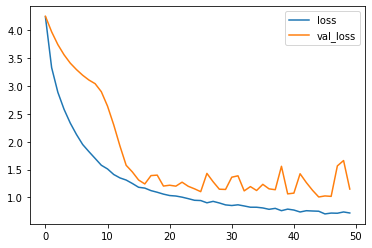

In [14]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label ="val_loss")

plt.legend()
plt.show()

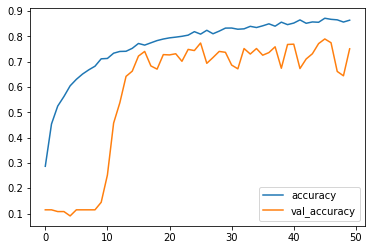

In [15]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label ="val_accuracy")

plt.legend()
plt.show()

In [19]:
model.evaluate(x_test,y_test)

28/28 [==============================] - 2s 31ms/step - loss: 1.1733 - accuracy: 0.7311


[1.1732844114303589, 0.731121301651001]

modelin dogrulugu %73 hesaplandi.

In [99]:
tags = {
0 : 'air_conditioner',
1 : 'car_horn',
2 : 'children_playing',
3 : 'dog_bark',
4 : 'drilling',
5 : 'engine_idling',
6 : 'gun_shot',
7 : 'jackhammer',
8 : 'siren',
9 : 'street_music'}

testler

In [70]:
y_test[3]

9

In [104]:
predict_1 = model.predict(x_test[3].reshape(1,128,128,1))
tag_1 = predict_1.argmax()
probability_1 = predict_1.max()

print(f"x_test[3] is {probability_1} percent {tags[tag_1]}")

x_test[3] is 0.6324378848075867 percent street_music


In [89]:
y_test[33]

3

In [96]:
predict_2 = model.predict(x_test[33].reshape(1,128,128,1))
tag_2 = predict_2.argmax()
probability_2 = predict_2.max()

print(f"x_test[33] is {probability_2} percent {tags[tag_2]}")

x_test[33] is 0.9622654914855957 percent dog_bark


In [97]:
y_test[566]

7

In [98]:
predict_3 = model.predict(x_test[566].reshape(1,128,128,1))
tag_3 = predict_3.argmax()
probability_3 = predict_3.max()

print(f"x_test[566] is {probability_3} percent {tags[tag_3]}")

x_test[566] is 0.857923686504364 percent jackhammer
